In [57]:
import os

import pandas as pd
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.metrics import BinaryCrossentropy
from tensorflow.keras import regularizers

In [58]:
df: pd.DataFrame = pd.read_csv(r"C:\Users\krish\Downloads\heart.csv") #https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [60]:
x = df.drop(['target'], axis=1)
y = df['target']

In [61]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.15, stratify=y, random_state=137)

In [62]:
regularizers_list = [
    regularizers.l1(0.01),        # L1 regularization
    regularizers.l2(0.01),        # L2 regularization
    regularizers.l1_l2(l1=0.01, l2=0.01),  # L1 and L2 combined
    None                          # No regularization
]
regularizers_list_names = [
    "L1",
    "L2",
    "L1+L2",
    "None"                          
]

In [63]:
def make_model(_regularizer, _i) -> keras.Sequential:
    model = keras.Sequential(name=f'Heart_disease_{_i}')
    model.add(tf.keras.Input((13,)))
    model.add(Dense(256, activation='relu', kernel_regularizer=_regularizer))
    model.add(Dense(256, activation='relu', kernel_regularizer=_regularizer))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(
        loss='binary_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )

    model.summary()
    return model

In [64]:
models = []
for i, regularizer in enumerate(regularizers_list):
    model = make_model(regularizer, i)
    models.append(model)

Model: "Heart_disease_0"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 256)               3584      
                                                                 
 dense_25 (Dense)            (None, 256)               65792     
                                                                 
 dense_26 (Dense)            (None, 1)                 257       
                                                                 
Total params: 69633 (272.00 KB)
Trainable params: 69633 (272.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "Heart_disease_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 256)               3584      
                                                      

In [65]:
histories = []
for i, model in enumerate(models):
    histories.append(model.fit(xtrain, ytrain, epochs=500, batch_size=8).history)
    model.save(f'saved/Q1/diabetes_{i}.h5')

Epoch 1/500
109/109 [==============================] - 1s 2ms/step - loss: 21.5618 - accuracy: 0.5476
Epoch 2/500
109/109 [==============================] - 0s 2ms/step - loss: 10.3938 - accuracy: 0.6223
Epoch 3/500
109/109 [==============================] - 0s 2ms/step - loss: 8.2444 - accuracy: 0.6406
Epoch 4/500
109/109 [==============================] - 0s 2ms/step - loss: 7.5313 - accuracy: 0.6142
Epoch 5/500
109/109 [==============================] - 0s 2ms/step - loss: 6.4411 - accuracy: 0.6429
Epoch 6/500
109/109 [==============================] - 0s 2ms/step - loss: 5.8861 - accuracy: 0.6625
Epoch 7/500
109/109 [==============================] - 0s 2ms/step - loss: 5.2520 - accuracy: 0.6510
Epoch 8/500
109/109 [==============================] - 0s 2ms/step - loss: 4.7960 - accuracy: 0.6418
Epoch 9/500
109/109 [==============================] - 0s 2ms/step - loss: 4.5538 - accuracy: 0.6349
Epoch 10/500
109/109 [==============================] - 0s 2ms/step - loss: 4.0045 - accu

109/109 [==============================] - 0s 2ms/step - loss: 0.5781 - accuracy: 0.8312
Epoch 82/500
109/109 [==============================] - 0s 3ms/step - loss: 0.5725 - accuracy: 0.8186
Epoch 83/500
109/109 [==============================] - 0s 2ms/step - loss: 0.5567 - accuracy: 0.8324
Epoch 84/500
109/109 [==============================] - 0s 2ms/step - loss: 0.5627 - accuracy: 0.8266
Epoch 85/500
109/109 [==============================] - 0s 2ms/step - loss: 0.5659 - accuracy: 0.8255
Epoch 86/500
109/109 [==============================] - 0s 2ms/step - loss: 0.5637 - accuracy: 0.8243
Epoch 87/500
109/109 [==============================] - 0s 2ms/step - loss: 0.5590 - accuracy: 0.8301
Epoch 88/500
109/109 [==============================] - 0s 2ms/step - loss: 0.5564 - accuracy: 0.8370
Epoch 89/500
109/109 [==============================] - 0s 2ms/step - loss: 0.5592 - accuracy: 0.8324
Epoch 90/500
109/109 [==============================] - 0s 2ms/step - loss: 0.5642 - accuracy: 

109/109 [==============================] - 0s 2ms/step - loss: 0.5398 - accuracy: 0.8312
Epoch 161/500
109/109 [==============================] - 0s 2ms/step - loss: 0.5435 - accuracy: 0.8404
Epoch 162/500
109/109 [==============================] - 0s 2ms/step - loss: 0.5409 - accuracy: 0.8450
Epoch 163/500
109/109 [==============================] - 0s 2ms/step - loss: 0.5477 - accuracy: 0.8324
Epoch 164/500
109/109 [==============================] - 0s 2ms/step - loss: 0.5377 - accuracy: 0.8278
Epoch 165/500
109/109 [==============================] - 0s 2ms/step - loss: 0.5337 - accuracy: 0.8370
Epoch 166/500
109/109 [==============================] - 0s 2ms/step - loss: 0.5407 - accuracy: 0.8450
Epoch 167/500
109/109 [==============================] - 0s 2ms/step - loss: 0.5669 - accuracy: 0.8129
Epoch 168/500
109/109 [==============================] - 0s 2ms/step - loss: 0.5458 - accuracy: 0.8370
Epoch 169/500
109/109 [==============================] - 0s 2ms/step - loss: 0.5593 - a

109/109 [==============================] - 0s 2ms/step - loss: 0.5281 - accuracy: 0.8404
Epoch 240/500
109/109 [==============================] - 0s 2ms/step - loss: 0.5305 - accuracy: 0.8450
Epoch 241/500
109/109 [==============================] - 0s 2ms/step - loss: 0.5255 - accuracy: 0.8312
Epoch 242/500
109/109 [==============================] - 0s 1ms/step - loss: 0.5305 - accuracy: 0.8404
Epoch 243/500
109/109 [==============================] - 0s 2ms/step - loss: 0.5330 - accuracy: 0.8255
Epoch 244/500
109/109 [==============================] - 0s 2ms/step - loss: 0.5544 - accuracy: 0.8140
Epoch 245/500
109/109 [==============================] - 0s 2ms/step - loss: 0.5319 - accuracy: 0.8462
Epoch 246/500
109/109 [==============================] - 0s 2ms/step - loss: 0.5711 - accuracy: 0.7991
Epoch 247/500
109/109 [==============================] - 0s 2ms/step - loss: 0.5360 - accuracy: 0.8289
Epoch 248/500
109/109 [==============================] - 0s 2ms/step - loss: 0.5322 - a

109/109 [==============================] - 0s 2ms/step - loss: 0.5410 - accuracy: 0.8117
Epoch 319/500
109/109 [==============================] - 0s 1ms/step - loss: 0.5299 - accuracy: 0.8232
Epoch 320/500
109/109 [==============================] - 0s 2ms/step - loss: 0.5286 - accuracy: 0.8358
Epoch 321/500
109/109 [==============================] - 0s 2ms/step - loss: 0.5267 - accuracy: 0.8450
Epoch 322/500
109/109 [==============================] - 0s 2ms/step - loss: 0.5243 - accuracy: 0.8416
Epoch 323/500
109/109 [==============================] - 0s 2ms/step - loss: 0.5300 - accuracy: 0.8278
Epoch 324/500
109/109 [==============================] - 0s 2ms/step - loss: 0.5311 - accuracy: 0.8347
Epoch 325/500
109/109 [==============================] - 0s 1ms/step - loss: 0.5154 - accuracy: 0.8439
Epoch 326/500
109/109 [==============================] - 0s 2ms/step - loss: 0.5253 - accuracy: 0.8370
Epoch 327/500
109/109 [==============================] - 0s 2ms/step - loss: 0.5190 - a

109/109 [==============================] - 0s 2ms/step - loss: 0.5315 - accuracy: 0.8278
Epoch 398/500
109/109 [==============================] - 0s 2ms/step - loss: 0.5273 - accuracy: 0.8312
Epoch 399/500
109/109 [==============================] - 0s 1ms/step - loss: 0.5306 - accuracy: 0.8243
Epoch 400/500
109/109 [==============================] - 0s 3ms/step - loss: 0.5202 - accuracy: 0.8358
Epoch 401/500
109/109 [==============================] - 0s 2ms/step - loss: 0.5171 - accuracy: 0.8450
Epoch 402/500
109/109 [==============================] - 0s 2ms/step - loss: 0.5123 - accuracy: 0.8439
Epoch 403/500
109/109 [==============================] - 0s 2ms/step - loss: 0.5212 - accuracy: 0.8416
Epoch 404/500
109/109 [==============================] - 0s 2ms/step - loss: 0.5252 - accuracy: 0.8358
Epoch 405/500
109/109 [==============================] - 0s 2ms/step - loss: 0.5249 - accuracy: 0.8347
Epoch 406/500
109/109 [==============================] - 0s 2ms/step - loss: 0.5180 - a

109/109 [==============================] - 0s 2ms/step - loss: 0.5374 - accuracy: 0.8163
Epoch 477/500
109/109 [==============================] - 0s 2ms/step - loss: 0.5197 - accuracy: 0.8393
Epoch 478/500
109/109 [==============================] - 0s 1ms/step - loss: 0.5234 - accuracy: 0.8266
Epoch 479/500
109/109 [==============================] - 0s 2ms/step - loss: 0.5471 - accuracy: 0.8243
Epoch 480/500
109/109 [==============================] - 0s 2ms/step - loss: 0.5168 - accuracy: 0.8404
Epoch 481/500
109/109 [==============================] - 0s 2ms/step - loss: 0.5191 - accuracy: 0.8347
Epoch 482/500
109/109 [==============================] - 0s 2ms/step - loss: 0.5153 - accuracy: 0.8416
Epoch 483/500
109/109 [==============================] - 0s 2ms/step - loss: 0.5233 - accuracy: 0.8335
Epoch 484/500
109/109 [==============================] - 0s 2ms/step - loss: 0.5151 - accuracy: 0.8462
Epoch 485/500
109/109 [==============================] - 0s 2ms/step - loss: 0.5156 - a

C:\Users\krish\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


109/109 [==============================] - 1s 2ms/step - loss: 2.6794 - accuracy: 0.6016
Epoch 2/500
109/109 [==============================] - 0s 2ms/step - loss: 2.0681 - accuracy: 0.6119
Epoch 3/500
109/109 [==============================] - 0s 2ms/step - loss: 1.7445 - accuracy: 0.6441
Epoch 4/500
109/109 [==============================] - 0s 2ms/step - loss: 1.8102 - accuracy: 0.6395
Epoch 5/500
109/109 [==============================] - 0s 2ms/step - loss: 1.4664 - accuracy: 0.7118
Epoch 6/500
109/109 [==============================] - 0s 2ms/step - loss: 1.3798 - accuracy: 0.6980
Epoch 7/500
109/109 [==============================] - 0s 2ms/step - loss: 1.1418 - accuracy: 0.7348
Epoch 8/500
109/109 [==============================] - 0s 2ms/step - loss: 1.1727 - accuracy: 0.7382
Epoch 9/500
109/109 [==============================] - 0s 1ms/step - loss: 1.1703 - accuracy: 0.7222
Epoch 10/500
109/109 [==============================] - 0s 2ms/step - loss: 1.2479 - accuracy: 0.7026
E

109/109 [==============================] - 0s 2ms/step - loss: 0.4912 - accuracy: 0.7991
Epoch 82/500
109/109 [==============================] - 0s 2ms/step - loss: 0.4708 - accuracy: 0.8175
Epoch 83/500
109/109 [==============================] - 0s 1ms/step - loss: 0.4691 - accuracy: 0.8209
Epoch 84/500
109/109 [==============================] - 0s 2ms/step - loss: 0.4800 - accuracy: 0.8197
Epoch 85/500
109/109 [==============================] - 0s 927us/step - loss: 0.4651 - accuracy: 0.8220
Epoch 86/500
109/109 [==============================] - 0s 2ms/step - loss: 0.4510 - accuracy: 0.8347
Epoch 87/500
109/109 [==============================] - 0s 2ms/step - loss: 0.4679 - accuracy: 0.8083
Epoch 88/500
109/109 [==============================] - 0s 2ms/step - loss: 0.4498 - accuracy: 0.8289
Epoch 89/500
109/109 [==============================] - 0s 2ms/step - loss: 0.4406 - accuracy: 0.8347
Epoch 90/500
109/109 [==============================] - 0s 2ms/step - loss: 0.4645 - accuracy

109/109 [==============================] - 0s 2ms/step - loss: 0.4103 - accuracy: 0.8450
Epoch 161/500
109/109 [==============================] - 0s 1ms/step - loss: 0.4143 - accuracy: 0.8324
Epoch 162/500
109/109 [==============================] - 0s 2ms/step - loss: 0.4348 - accuracy: 0.8278
Epoch 163/500
109/109 [==============================] - 0s 2ms/step - loss: 0.4185 - accuracy: 0.8186
Epoch 164/500
109/109 [==============================] - 0s 2ms/step - loss: 0.4065 - accuracy: 0.8462
Epoch 165/500
109/109 [==============================] - 0s 2ms/step - loss: 0.4235 - accuracy: 0.8266
Epoch 166/500
109/109 [==============================] - 0s 2ms/step - loss: 0.4182 - accuracy: 0.8450
Epoch 167/500
109/109 [==============================] - 0s 2ms/step - loss: 0.4149 - accuracy: 0.8347
Epoch 168/500
109/109 [==============================] - 0s 2ms/step - loss: 0.4066 - accuracy: 0.8427
Epoch 169/500
109/109 [==============================] - 0s 2ms/step - loss: 0.4150 - a

109/109 [==============================] - 0s 2ms/step - loss: 0.3859 - accuracy: 0.8496
Epoch 240/500
109/109 [==============================] - 0s 2ms/step - loss: 0.3897 - accuracy: 0.8553
Epoch 241/500
109/109 [==============================] - 0s 1ms/step - loss: 0.4295 - accuracy: 0.8152
Epoch 242/500
109/109 [==============================] - 0s 2ms/step - loss: 0.3672 - accuracy: 0.8588
Epoch 243/500
109/109 [==============================] - 0s 2ms/step - loss: 0.3954 - accuracy: 0.8393
Epoch 244/500
109/109 [==============================] - 0s 2ms/step - loss: 0.3691 - accuracy: 0.8576
Epoch 245/500
109/109 [==============================] - 0s 2ms/step - loss: 0.4112 - accuracy: 0.8404
Epoch 246/500
109/109 [==============================] - 0s 2ms/step - loss: 0.3895 - accuracy: 0.8462
Epoch 247/500
109/109 [==============================] - 0s 2ms/step - loss: 0.3771 - accuracy: 0.8576
Epoch 248/500
109/109 [==============================] - 0s 1ms/step - loss: 0.3780 - a

109/109 [==============================] - 0s 2ms/step - loss: 0.3596 - accuracy: 0.8485
Epoch 319/500
109/109 [==============================] - 0s 2ms/step - loss: 0.4162 - accuracy: 0.8255
Epoch 320/500
109/109 [==============================] - 0s 2ms/step - loss: 0.4156 - accuracy: 0.8209
Epoch 321/500
109/109 [==============================] - 0s 3ms/step - loss: 0.3646 - accuracy: 0.8530
Epoch 322/500
109/109 [==============================] - 0s 2ms/step - loss: 0.3760 - accuracy: 0.8416
Epoch 323/500
109/109 [==============================] - 0s 1ms/step - loss: 0.3731 - accuracy: 0.8565
Epoch 324/500
109/109 [==============================] - 0s 2ms/step - loss: 0.3675 - accuracy: 0.8530
Epoch 325/500
109/109 [==============================] - 0s 2ms/step - loss: 0.3793 - accuracy: 0.8393
Epoch 326/500
109/109 [==============================] - 0s 2ms/step - loss: 0.3779 - accuracy: 0.8496
Epoch 327/500
109/109 [==============================] - 0s 1ms/step - loss: 0.3830 - a

109/109 [==============================] - 0s 2ms/step - loss: 0.3523 - accuracy: 0.8634
Epoch 398/500
109/109 [==============================] - 0s 2ms/step - loss: 0.3348 - accuracy: 0.8680
Epoch 399/500
109/109 [==============================] - 0s 2ms/step - loss: 0.3427 - accuracy: 0.8576
Epoch 400/500
109/109 [==============================] - 0s 1ms/step - loss: 0.3443 - accuracy: 0.8714
Epoch 401/500
109/109 [==============================] - 0s 2ms/step - loss: 0.3596 - accuracy: 0.8576
Epoch 402/500
109/109 [==============================] - 0s 2ms/step - loss: 0.3526 - accuracy: 0.8634
Epoch 403/500
109/109 [==============================] - 0s 2ms/step - loss: 0.3441 - accuracy: 0.8726
Epoch 404/500
109/109 [==============================] - 0s 1ms/step - loss: 0.3478 - accuracy: 0.8645
Epoch 405/500
109/109 [==============================] - 0s 2ms/step - loss: 0.3368 - accuracy: 0.8680
Epoch 406/500
109/109 [==============================] - 0s 2ms/step - loss: 0.3355 - a

109/109 [==============================] - 0s 2ms/step - loss: 0.4020 - accuracy: 0.8312
Epoch 477/500
109/109 [==============================] - 0s 1ms/step - loss: 0.3912 - accuracy: 0.8450
Epoch 478/500
109/109 [==============================] - 0s 2ms/step - loss: 0.4118 - accuracy: 0.8312
Epoch 479/500
109/109 [==============================] - 0s 2ms/step - loss: 0.4074 - accuracy: 0.8266
Epoch 480/500
109/109 [==============================] - 0s 2ms/step - loss: 0.4068 - accuracy: 0.8427
Epoch 481/500
109/109 [==============================] - 0s 2ms/step - loss: 0.3705 - accuracy: 0.8450
Epoch 482/500
109/109 [==============================] - 0s 2ms/step - loss: 0.3783 - accuracy: 0.8358
Epoch 483/500
109/109 [==============================] - 0s 2ms/step - loss: 0.3776 - accuracy: 0.8416
Epoch 484/500
109/109 [==============================] - 0s 2ms/step - loss: 0.3691 - accuracy: 0.8519
Epoch 485/500
109/109 [==============================] - 0s 2ms/step - loss: 0.3704 - a

C:\Users\krish\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


109/109 [==============================] - 1s 3ms/step - loss: 23.2297 - accuracy: 0.5890
Epoch 2/500
109/109 [==============================] - 0s 2ms/step - loss: 11.2715 - accuracy: 0.5798
Epoch 3/500
109/109 [==============================] - 0s 2ms/step - loss: 9.0610 - accuracy: 0.6096
Epoch 4/500
109/109 [==============================] - 0s 2ms/step - loss: 7.7441 - accuracy: 0.6073
Epoch 5/500
109/109 [==============================] - 0s 1ms/step - loss: 6.9417 - accuracy: 0.6062
Epoch 6/500
109/109 [==============================] - 0s 3ms/step - loss: 6.3516 - accuracy: 0.6315
Epoch 7/500
109/109 [==============================] - 0s 2ms/step - loss: 5.5733 - accuracy: 0.6338
Epoch 8/500
109/109 [==============================] - 0s 2ms/step - loss: 5.1134 - accuracy: 0.6464
Epoch 9/500
109/109 [==============================] - 0s 2ms/step - loss: 4.6501 - accuracy: 0.6280
Epoch 10/500
109/109 [==============================] - 0s 3ms/step - loss: 4.2962 - accuracy: 0.6246

109/109 [==============================] - 0s 2ms/step - loss: 0.6623 - accuracy: 0.7302
Epoch 82/500
109/109 [==============================] - 0s 2ms/step - loss: 0.6755 - accuracy: 0.7405
Epoch 83/500
109/109 [==============================] - 0s 3ms/step - loss: 0.6580 - accuracy: 0.7371
Epoch 84/500
109/109 [==============================] - 0s 2ms/step - loss: 0.6560 - accuracy: 0.7428
Epoch 85/500
109/109 [==============================] - 0s 2ms/step - loss: 0.6531 - accuracy: 0.7566
Epoch 86/500
109/109 [==============================] - 0s 2ms/step - loss: 0.6427 - accuracy: 0.7520
Epoch 87/500
109/109 [==============================] - 0s 2ms/step - loss: 0.6423 - accuracy: 0.7520
Epoch 88/500
109/109 [==============================] - 0s 2ms/step - loss: 0.6418 - accuracy: 0.7623
Epoch 89/500
109/109 [==============================] - 0s 2ms/step - loss: 0.6445 - accuracy: 0.7681
Epoch 90/500
109/109 [==============================] - 0s 2ms/step - loss: 0.6580 - accuracy: 

109/109 [==============================] - 0s 2ms/step - loss: 0.5514 - accuracy: 0.8289
Epoch 161/500
109/109 [==============================] - 0s 3ms/step - loss: 0.5495 - accuracy: 0.8175
Epoch 162/500
109/109 [==============================] - 0s 2ms/step - loss: 0.5576 - accuracy: 0.8347
Epoch 163/500
109/109 [==============================] - 0s 2ms/step - loss: 0.5711 - accuracy: 0.8266
Epoch 164/500
109/109 [==============================] - 0s 3ms/step - loss: 0.5689 - accuracy: 0.8129
Epoch 165/500
109/109 [==============================] - 0s 3ms/step - loss: 0.5709 - accuracy: 0.8358
Epoch 166/500
109/109 [==============================] - 0s 2ms/step - loss: 0.5644 - accuracy: 0.8278
Epoch 167/500
109/109 [==============================] - 0s 2ms/step - loss: 0.5747 - accuracy: 0.8255
Epoch 168/500
109/109 [==============================] - 0s 1ms/step - loss: 0.5520 - accuracy: 0.8175
Epoch 169/500
109/109 [==============================] - 0s 3ms/step - loss: 0.5637 - a

109/109 [==============================] - 0s 2ms/step - loss: 0.5353 - accuracy: 0.8404
Epoch 240/500
109/109 [==============================] - 0s 2ms/step - loss: 0.5375 - accuracy: 0.8347
Epoch 241/500
109/109 [==============================] - 0s 2ms/step - loss: 0.5421 - accuracy: 0.8347
Epoch 242/500
109/109 [==============================] - 0s 3ms/step - loss: 0.5404 - accuracy: 0.8301
Epoch 243/500
109/109 [==============================] - 0s 2ms/step - loss: 0.5337 - accuracy: 0.8370
Epoch 244/500
109/109 [==============================] - 0s 2ms/step - loss: 0.5387 - accuracy: 0.8404
Epoch 245/500
109/109 [==============================] - 0s 2ms/step - loss: 0.5463 - accuracy: 0.8209
Epoch 246/500
109/109 [==============================] - 0s 2ms/step - loss: 0.5366 - accuracy: 0.8416
Epoch 247/500
109/109 [==============================] - 0s 3ms/step - loss: 0.5704 - accuracy: 0.8094
Epoch 248/500
109/109 [==============================] - 0s 2ms/step - loss: 0.5714 - a

109/109 [==============================] - 0s 2ms/step - loss: 0.5395 - accuracy: 0.8301
Epoch 319/500
109/109 [==============================] - 0s 2ms/step - loss: 0.5249 - accuracy: 0.8519
Epoch 320/500
109/109 [==============================] - 0s 2ms/step - loss: 0.5293 - accuracy: 0.8416
Epoch 321/500
109/109 [==============================] - 0s 2ms/step - loss: 0.5591 - accuracy: 0.8186
Epoch 322/500
109/109 [==============================] - 0s 2ms/step - loss: 0.5566 - accuracy: 0.8083
Epoch 323/500
109/109 [==============================] - 0s 2ms/step - loss: 0.5359 - accuracy: 0.8220
Epoch 324/500
109/109 [==============================] - 0s 2ms/step - loss: 0.5385 - accuracy: 0.8232
Epoch 325/500
109/109 [==============================] - 0s 2ms/step - loss: 0.5358 - accuracy: 0.8278
Epoch 326/500
109/109 [==============================] - 0s 2ms/step - loss: 0.5314 - accuracy: 0.8347
Epoch 327/500
109/109 [==============================] - 0s 2ms/step - loss: 0.5302 - a

109/109 [==============================] - 0s 2ms/step - loss: 0.5365 - accuracy: 0.8301
Epoch 398/500
109/109 [==============================] - 0s 2ms/step - loss: 0.5213 - accuracy: 0.8324
Epoch 399/500
109/109 [==============================] - 0s 3ms/step - loss: 0.5504 - accuracy: 0.8140
Epoch 400/500
109/109 [==============================] - 0s 3ms/step - loss: 0.5242 - accuracy: 0.8485
Epoch 401/500
109/109 [==============================] - 0s 2ms/step - loss: 0.5376 - accuracy: 0.8289
Epoch 402/500
109/109 [==============================] - 0s 2ms/step - loss: 0.5358 - accuracy: 0.8232
Epoch 403/500
109/109 [==============================] - 0s 2ms/step - loss: 0.5355 - accuracy: 0.8496
Epoch 404/500
109/109 [==============================] - 0s 2ms/step - loss: 0.5261 - accuracy: 0.8278
Epoch 405/500
109/109 [==============================] - 0s 2ms/step - loss: 0.5213 - accuracy: 0.8381
Epoch 406/500
109/109 [==============================] - 0s 3ms/step - loss: 0.5200 - a

109/109 [==============================] - 0s 2ms/step - loss: 0.5299 - accuracy: 0.8163
Epoch 477/500
109/109 [==============================] - 0s 2ms/step - loss: 0.5364 - accuracy: 0.8106
Epoch 478/500
109/109 [==============================] - 0s 3ms/step - loss: 0.5475 - accuracy: 0.8186
Epoch 479/500
109/109 [==============================] - 0s 2ms/step - loss: 0.5178 - accuracy: 0.8381
Epoch 480/500
109/109 [==============================] - 0s 3ms/step - loss: 0.5368 - accuracy: 0.8278
Epoch 481/500
109/109 [==============================] - 0s 2ms/step - loss: 0.5239 - accuracy: 0.8289
Epoch 482/500
109/109 [==============================] - 0s 3ms/step - loss: 0.5357 - accuracy: 0.8358
Epoch 483/500
109/109 [==============================] - 0s 2ms/step - loss: 0.5277 - accuracy: 0.8347
Epoch 484/500
109/109 [==============================] - 0s 2ms/step - loss: 0.5251 - accuracy: 0.8243
Epoch 485/500
109/109 [==============================] - 0s 2ms/step - loss: 0.5179 - a

C:\Users\krish\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


109/109 [==============================] - 1s 2ms/step - loss: 2.4591 - accuracy: 0.5844
Epoch 2/500
109/109 [==============================] - 0s 2ms/step - loss: 0.8974 - accuracy: 0.6521
Epoch 3/500
109/109 [==============================] - 0s 2ms/step - loss: 0.6678 - accuracy: 0.7130
Epoch 4/500
109/109 [==============================] - 0s 2ms/step - loss: 0.7213 - accuracy: 0.7084
Epoch 5/500
109/109 [==============================] - 0s 1ms/step - loss: 0.8119 - accuracy: 0.6969
Epoch 6/500
109/109 [==============================] - 0s 2ms/step - loss: 0.6200 - accuracy: 0.7486
Epoch 7/500
109/109 [==============================] - 0s 2ms/step - loss: 0.5244 - accuracy: 0.7761
Epoch 8/500
109/109 [==============================] - 0s 2ms/step - loss: 0.5927 - accuracy: 0.7704
Epoch 9/500
109/109 [==============================] - 0s 2ms/step - loss: 0.6103 - accuracy: 0.7589
Epoch 10/500
109/109 [==============================] - 0s 2ms/step - loss: 0.5804 - accuracy: 0.7520
E

109/109 [==============================] - 0s 2ms/step - loss: 0.2636 - accuracy: 0.8886
Epoch 82/500
109/109 [==============================] - 0s 2ms/step - loss: 0.2682 - accuracy: 0.8749
Epoch 83/500
109/109 [==============================] - 0s 2ms/step - loss: 0.2844 - accuracy: 0.8772
Epoch 84/500
109/109 [==============================] - 0s 1ms/step - loss: 0.2687 - accuracy: 0.8737
Epoch 85/500
109/109 [==============================] - 0s 2ms/step - loss: 0.2558 - accuracy: 0.8760
Epoch 86/500
109/109 [==============================] - 0s 2ms/step - loss: 0.2475 - accuracy: 0.8852
Epoch 87/500
109/109 [==============================] - 0s 2ms/step - loss: 0.2530 - accuracy: 0.8852
Epoch 88/500
109/109 [==============================] - 0s 2ms/step - loss: 0.2440 - accuracy: 0.8898
Epoch 89/500
109/109 [==============================] - 0s 2ms/step - loss: 0.2557 - accuracy: 0.8978
Epoch 90/500
109/109 [==============================] - 0s 2ms/step - loss: 0.2304 - accuracy: 

109/109 [==============================] - 0s 2ms/step - loss: 0.0916 - accuracy: 0.9656
Epoch 161/500
109/109 [==============================] - 0s 2ms/step - loss: 0.0501 - accuracy: 0.9862
Epoch 162/500
109/109 [==============================] - 0s 2ms/step - loss: 0.0427 - accuracy: 0.9908
Epoch 163/500
109/109 [==============================] - 0s 2ms/step - loss: 0.0343 - accuracy: 0.9931
Epoch 164/500
109/109 [==============================] - 0s 2ms/step - loss: 0.2836 - accuracy: 0.8978
Epoch 165/500
109/109 [==============================] - 0s 2ms/step - loss: 0.1130 - accuracy: 0.9495
Epoch 166/500
109/109 [==============================] - 0s 2ms/step - loss: 0.0372 - accuracy: 0.9943
Epoch 167/500
109/109 [==============================] - 0s 2ms/step - loss: 0.0311 - accuracy: 0.9954
Epoch 168/500
109/109 [==============================] - 0s 2ms/step - loss: 0.0245 - accuracy: 0.9966
Epoch 169/500
109/109 [==============================] - 0s 2ms/step - loss: 0.0269 - a

109/109 [==============================] - 0s 2ms/step - loss: 0.0498 - accuracy: 0.9897
Epoch 240/500
109/109 [==============================] - 0s 2ms/step - loss: 0.0213 - accuracy: 1.0000
Epoch 241/500
109/109 [==============================] - 0s 2ms/step - loss: 0.0185 - accuracy: 0.9989
Epoch 242/500
109/109 [==============================] - 0s 2ms/step - loss: 0.0579 - accuracy: 0.9828
Epoch 243/500
109/109 [==============================] - 0s 2ms/step - loss: 0.0188 - accuracy: 0.9977
Epoch 244/500
109/109 [==============================] - 0s 2ms/step - loss: 0.0121 - accuracy: 1.0000
Epoch 245/500
109/109 [==============================] - 0s 2ms/step - loss: 0.0113 - accuracy: 1.0000
Epoch 246/500
109/109 [==============================] - 0s 2ms/step - loss: 0.0107 - accuracy: 1.0000
Epoch 247/500
109/109 [==============================] - 0s 2ms/step - loss: 0.0097 - accuracy: 1.0000
Epoch 248/500
109/109 [==============================] - 0s 2ms/step - loss: 0.0085 - a

109/109 [==============================] - 0s 2ms/step - loss: 0.0355 - accuracy: 0.9885
Epoch 319/500
109/109 [==============================] - 0s 1ms/step - loss: 0.0217 - accuracy: 0.9989
Epoch 320/500
109/109 [==============================] - 0s 1ms/step - loss: 0.0148 - accuracy: 1.0000
Epoch 321/500
109/109 [==============================] - 0s 2ms/step - loss: 0.0122 - accuracy: 1.0000
Epoch 322/500
109/109 [==============================] - 0s 1ms/step - loss: 0.0366 - accuracy: 0.9908
Epoch 323/500
109/109 [==============================] - 0s 2ms/step - loss: 0.1141 - accuracy: 0.9529
Epoch 324/500
109/109 [==============================] - 0s 2ms/step - loss: 0.0978 - accuracy: 0.9598
Epoch 325/500
109/109 [==============================] - 0s 2ms/step - loss: 0.0223 - accuracy: 0.9977
Epoch 326/500
109/109 [==============================] - 0s 2ms/step - loss: 0.0124 - accuracy: 1.0000
Epoch 327/500
109/109 [==============================] - 0s 2ms/step - loss: 0.0084 - a

109/109 [==============================] - 0s 1ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 398/500
109/109 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 399/500
109/109 [==============================] - 0s 2ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 400/500
109/109 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 401/500
109/109 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 402/500
109/109 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 403/500
109/109 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 404/500
109/109 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 405/500
109/109 [==============================] - 0s 2ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 406/500
109/109 [==============================] - 0s 2ms/step - loss: 0.0016 - a

109/109 [==============================] - 0s 2ms/step - loss: 0.0869 - accuracy: 0.9713
Epoch 477/500
109/109 [==============================] - 0s 2ms/step - loss: 0.0718 - accuracy: 0.9759
Epoch 478/500
109/109 [==============================] - 0s 2ms/step - loss: 0.0716 - accuracy: 0.9816
Epoch 479/500
109/109 [==============================] - 0s 2ms/step - loss: 0.0637 - accuracy: 0.9885
Epoch 480/500
109/109 [==============================] - 0s 2ms/step - loss: 0.0682 - accuracy: 0.9736
Epoch 481/500
109/109 [==============================] - 0s 2ms/step - loss: 0.1480 - accuracy: 0.9369
Epoch 482/500
109/109 [==============================] - 0s 2ms/step - loss: 0.0792 - accuracy: 0.9679
Epoch 483/500
109/109 [==============================] - 0s 2ms/step - loss: 0.0791 - accuracy: 0.9656
Epoch 484/500
109/109 [==============================] - 0s 2ms/step - loss: 0.0639 - accuracy: 0.9759
Epoch 485/500
109/109 [==============================] - 0s 2ms/step - loss: 0.0528 - a

C:\Users\krish\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [66]:
histories[0].keys()

dict_keys(['loss', 'accuracy'])

In [67]:
acc_scores = []
hs = []
for i, model in enumerate(models):
    ypred = model.predict(xtest)
    print(ypred.shape)
    for j in range(len(ypred)):
        if ypred[j] < 0.5: ypred[j] = 0
        else: ypred[j] = 1
    print(ypred.shape)

    acc_scores.append(accuracy_score(ytest, ypred))

    hs.append({
        'acc': histories[i]['accuracy'],
        'loss': histories[i]['loss']
    })

5/5 [==============================] - 0s 2ms/step
(154, 1)
(154, 1)
5/5 [==============================] - 0s 1ms/step
(154, 1)
(154, 1)
5/5 [==============================] - 0s 1ms/step
(154, 1)
(154, 1)
5/5 [==============================] - 0s 1ms/step
(154, 1)
(154, 1)


In [68]:
for i, regularizer in enumerate(regularizers_list):
    print(f'{regularizers}: {acc_scores[i]:.2f}')

<module 'keras.api._v2.keras.regularizers' from 'C:\\Users\\krish\\AppData\\Roaming\\Python\\Python311\\site-packages\\keras\\api\\_v2\\keras\\regularizers\\__init__.py'>: 0.84
<module 'keras.api._v2.keras.regularizers' from 'C:\\Users\\krish\\AppData\\Roaming\\Python\\Python311\\site-packages\\keras\\api\\_v2\\keras\\regularizers\\__init__.py'>: 0.86
<module 'keras.api._v2.keras.regularizers' from 'C:\\Users\\krish\\AppData\\Roaming\\Python\\Python311\\site-packages\\keras\\api\\_v2\\keras\\regularizers\\__init__.py'>: 0.83
<module 'keras.api._v2.keras.regularizers' from 'C:\\Users\\krish\\AppData\\Roaming\\Python\\Python311\\site-packages\\keras\\api\\_v2\\keras\\regularizers\\__init__.py'>: 1.00


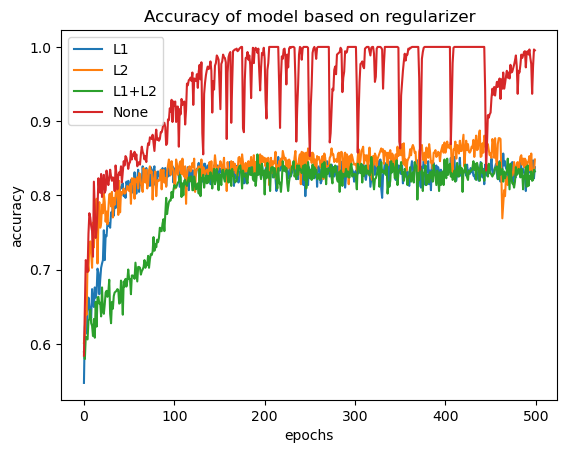

In [69]:
for i in range(len(hs)):
    plt.plot(hs[i]['acc'])
    plt.title('Accuracy of model based on regularizer')
    plt.ylabel('accuracy')
    plt.xlabel('epochs')

plt.legend(regularizers_list_names, loc='upper left')
plt.show()

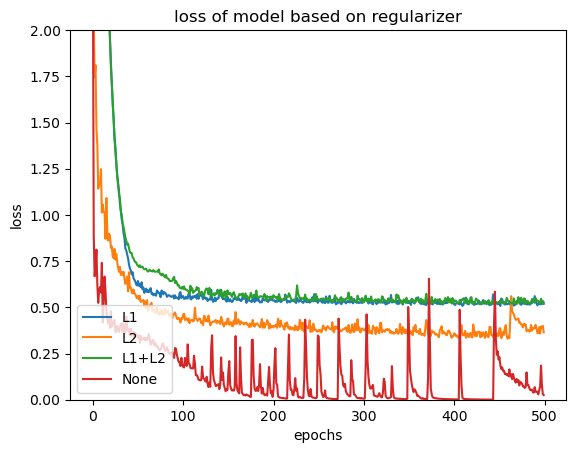

In [71]:
for i in range(len(hs)):
    plt.plot(hs[i]['loss'])
    plt.title('loss of model based on regularizer')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.ylim([0, 2.0])

plt.legend(regularizers_list_names, loc='lower left')
plt.show()